In [1]:
##### Imports #####
import os
import matplotlib.pyplot as plt
import pysam


#../outputs/zymo/contigs_on_references.bam

In [8]:
reads_alignement_prefix = "../outputs/zymo/" #"../outputs/salad-irg/" #
contigs_alignement_prefix = "../outputs/zymo/metaMDBG/" #"../outputs/salad-irg/metaMDBG/" #
references_prefix = "/groups/genscale/nimauric/ZymoD6331/" #"/groups/genscale/nimauric/soil_references/" #
references = [p.split(".")[1] for p in os.listdir(reads_alignement_prefix) if p.endswith(".bam")]

genome_fractions = {}


print("genome reads_genome_fraction contigs_genome_fraction")
def get_covered_bases(path) : 

    bamfile = pysam.AlignmentFile(path, "rb")

    covered_bases = 0
    for pileupcolumn in bamfile.pileup():
        if pileupcolumn.nsegments >= 1:
             covered_bases += 1
    
    bamfile.close()
    return covered_bases


for r in references : 
    ref_genome = pysam.FastaFile(references_prefix + r + ".fasta")
    ref_length = 0
    for seq_length in ref_genome.lengths:
        ref_length += seq_length
    ref_genome.close()

    reads_genome_fraction = get_covered_bases(reads_alignement_prefix + "reads_on_reference." + r + ".bam") / ref_length
    contigs_genome_fraction = get_covered_bases(contigs_alignement_prefix + "contigs_on_reference." + r + ".bam") / ref_length

    print(r, reads_genome_fraction, contigs_genome_fraction)
    genome_fractions[r] = [reads_genome_fraction, contigs_genome_fraction]




['reads_on_contigs.bam', 'contigs_on_reference.Pseudomonas_fluorescens.bam']
genome reads_genome_fraction contigs_genome_fraction


OSError: file `/groups/genscale/nimauric/soil_references/reads_on_contigs.bam.fasta` not found

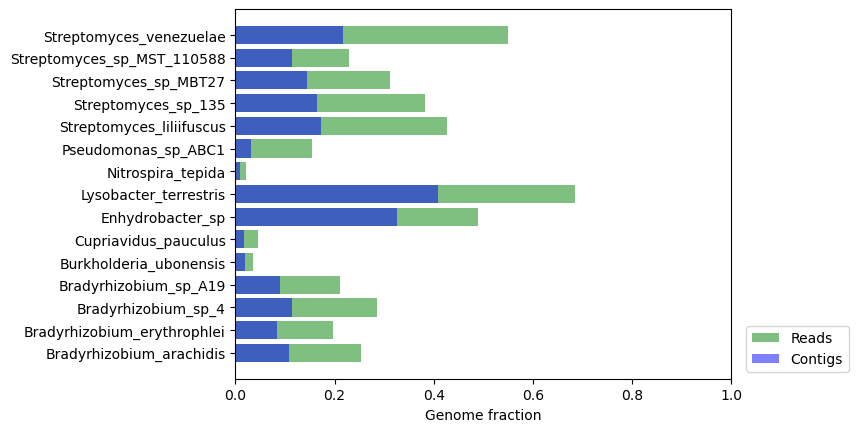

In [ ]:

genome_fractions = dict(sorted(genome_fractions.items()))
reads_genome_fraction = [tup[0] for tup in genome_fractions.values()]
contigs_genome_fraction = [tup[1] for tup in genome_fractions.values()]
reference_names = list(genome_fractions.keys())


# Creating barplots
plt.barh(reference_names, reads_genome_fraction, color='green', label="Reads", alpha=0.5)
plt.barh(reference_names, contigs_genome_fraction, color='blue', label="Contigs", alpha=0.5)

# Adding labels and title
plt.xlabel("Genome fraction")
plt.xlim(right=1)

plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0))